In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import json
from pandas.api.types import is_string_dtype, is_numeric_dtype
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

In [2]:
np.set_printoptions(precision=3, suppress=True)

tf.__version__

'2.3.1'

In [3]:
raw_dataset = pd.read_csv("features.csv", na_values='?'
                          , comment='\t'
                          , skipinitialspace=True)

dataset = raw_dataset.copy()

dataset.isna().sum()

# dataset = dataset.dropna()

kost_name_rough    0
kota               0
type_kos           0
area               0
facility_score     0
harga_nomina       0
dtype: int64

In [4]:
def train_cats(df):
	for n,c in df.items():
	    if is_string_dtype(c): 
	        df[n] = c.astype('category').cat.as_ordered()

train_cats(dataset)

In [5]:
dataset.drop(['kost_name_rough'], axis=1, inplace=True)

max_n_cat = None

In [6]:
for n,c in dataset.items(): 
    if not is_numeric_dtype(c) and (max_n_cat is None or c.nunique()>max_n_cat):
        dataset[n] = c.cat.codes+1

In [7]:
print(list(dataset.groupby(["kota"]).size().reset_index(name='counts')["kota"]))
print(list(raw_dataset.groupby(["kota"]).size().reset_index(name='counts')["kota"]))

print(list(dataset.groupby(["type_kos"]).size().reset_index(name='counts')["type_kos"]))
print(list(raw_dataset.groupby(["type_kos"]).size().reset_index(name='counts')["type_kos"]))

print(list(dataset.groupby(["area"]).size().reset_index(name='counts')["area"]))
print(list(raw_dataset.groupby(["area"]).size().reset_index(name='counts')["area"]))

[1, 2, 3, 4, 5, 6]
['bandung', 'jakarta', 'jogja', 'malang', 'semarang', 'surabaya']
[1, 2, 3]
['campur', 'putra', 'putri']
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77]
['arcamanik', 'babakan ciparay', 'bandung kidul', 'bandung wetan', 'bantul', 'banyumanik', 'batu', 'batununggal', 'blimbing', 'bojongloa kidul', 'buahbatu', 'cibeunying kaler', 'cicendo', 'cidadap', 'cilandak', 'coblong', 'depok', 'dukuhpakis', 'duren sawit', 'gajahmungkur', 'gambir', 'gayungan', 'gedong tengen', 'genuk', 'godean', 'gondokusuman', 'gondomanan', 'grogol petamburan', 'gubeng', 'gunung anyar', 'jatinangor', 'jetis', 'karang pilang', 'kelapa gading', 'kepanjen', 'klojen', 'koja', 'lengkong', 'lowokwaru', 'mantrijeron', 'mergangsan', 'mlati', 'mulyorejo', 'n

In [8]:
train_dataset = dataset.sample(frac=0.8, random_state=0)
test_dataset = dataset.drop(train_dataset.index)

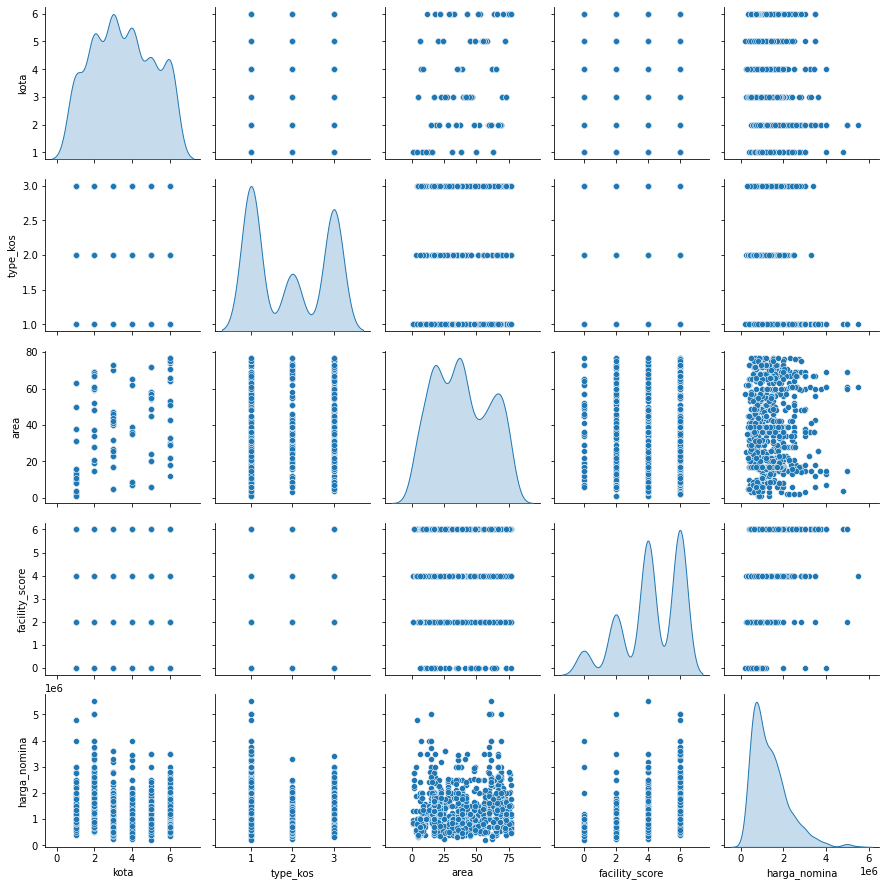

In [9]:
sns.pairplot(train_dataset, diag_kind='kde')

In [10]:
train_dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
kota,854.0,3.497658e+00,1.596264,1.0,2.00,3.0,5.0,6.0
type_kos,854.0,1.928571e+00,0.905009,1.0,1.00,2.0,3.0,3.0
area,854.0,3.858899e+01,21.421104,1.0,19.25,37.0,57.0,77.0
facility_score,854.0,4.196721e+00,1.814023,0.0,4.00,4.0,6.0,6.0
harga_nomina,854.0,1.363208e+06,846264.414360,200000.0,700000.00,1200000.0,1800000.0,5500000.0


In [11]:
train_features = train_dataset.copy()
test_features = test_dataset.copy()

In [12]:
train_labels = train_features.pop('harga_nomina')
test_labels = test_features.pop('harga_nomina')

In [13]:
train_features

,kota,type_kos,area,facility_score
1066,4,3,39,6
549,4,2,62,2
103,5,1,20,4
759,4,2,39,4
453,1,2,11,6
...,...,...,...,...
1007,4,3,36,4
207,2,3,67,6
438,1,1,11,6
552,4,3,35,2


In [14]:
train_labels

1066    1200000
549      225000
103      900000
759      550000
453     1100000
         ...   
1007    1000000
207     2600000
438     1000000
552      300000
274     4000000
Name: harga_nomina, Length: 854, dtype: int64

In [15]:
normalizer = preprocessing.Normalization()

normalizer.adapt(np.array(train_features))

print(normalizer.mean.numpy())

train_features[:5]

first = np.array(train_features[:1])

print(normalizer.mean.numpy())

[ 3.498  1.929 38.589  4.197]
[ 3.498  1.929 38.589  4.197]


In [16]:
train_features[:1]

,kota,type_kos,area,facility_score
1066,4,3,39,6


In [17]:
with np.printoptions(precision=2, suppress=True):
  print(first)
  print(normalizer(first).numpy())

[[ 4  3 39  6]]
[[0.31 1.18 0.02 0.99]]


In [18]:
np.shape(np.array(train_features))

(854, 4)

In [19]:
model = keras.Sequential([
                            layers.Input(shape=(4,)),
                            preprocessing.Normalization(input_shape=[4,]),
                            layers.Dense(32, activation='relu'),
                            layers.Dense(32, activation='relu'),
                            layers.Dense(1)
  ])

model.compile(loss='mean_absolute_error',
            optimizer=tf.keras.optimizers.Adam(0.001))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
normalization_1 (Normalizati (None, 4)                 9         
_________________________________________________________________
dense (Dense)                (None, 32)                160       
_________________________________________________________________
dense_1 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 1,258
Trainable params: 1,249
Non-trainable params: 9
_________________________________________________________________


In [20]:
%%time
history = model.fit(
    train_features,
    train_labels,
    validation_split=0.2,
    verbose=0,
    epochs=100
)

CPU times: user 5.75 s, sys: 644 ms, total: 6.4 s
Wall time: 3.97 s


In [21]:
def plot_loss(history):
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.ylim([0, 20])
    plt.xlabel('Epoch')
    plt.ylabel('Error [harga_nomina]')
    plt.legend()
    plt.grid(True)

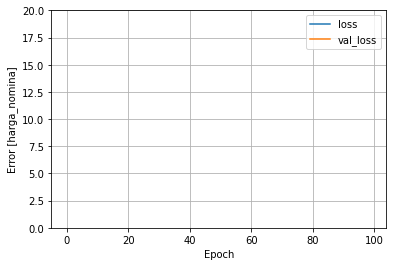

In [22]:
plot_loss(history)

In [24]:
test_result = model.evaluate(
    test_features, 
    test_labels,
    verbose=0
)
print(test_result)

690193.75


In [25]:
%%time
history = model.fit(
    train_features,
    train_labels,
    validation_split=0.2,
    verbose=2,
    epochs=1000
)

Epoch 1/1000
22/22 - 0s - loss: 764039.1875 - val_loss: 714569.3750
Epoch 2/1000
22/22 - 0s - loss: 762362.3125 - val_loss: 711891.0625
Epoch 3/1000
22/22 - 0s - loss: 760978.0625 - val_loss: 709400.0000
Epoch 4/1000
22/22 - 0s - loss: 759649.3750 - val_loss: 707582.3750
Epoch 5/1000
22/22 - 0s - loss: 758512.3750 - val_loss: 705757.3750
Epoch 6/1000
22/22 - 0s - loss: 757414.8125 - val_loss: 703994.5625
Epoch 7/1000
22/22 - 0s - loss: 756445.8125 - val_loss: 702309.1875
Epoch 8/1000
22/22 - 0s - loss: 755383.3750 - val_loss: 700673.0625
Epoch 9/1000
22/22 - 0s - loss: 754419.6250 - val_loss: 699127.7500
Epoch 10/1000
22/22 - 0s - loss: 753554.4375 - val_loss: 697621.5000
Epoch 11/1000
22/22 - 0s - loss: 752800.4375 - val_loss: 696078.0000
Epoch 12/1000
22/22 - 0s - loss: 751949.3125 - val_loss: 694794.0000
Epoch 13/1000
22/22 - 0s - loss: 751307.5625 - val_loss: 693519.8125
Epoch 14/1000
22/22 - 0s - loss: 750741.8125 - val_loss: 692560.8750
Epoch 15/1000
22/22 - 0s - loss: 750268.312

Epoch 120/1000
22/22 - 0s - loss: 723532.1250 - val_loss: 662434.2500
Epoch 121/1000
22/22 - 0s - loss: 723309.2500 - val_loss: 662310.1875
Epoch 122/1000
22/22 - 0s - loss: 722973.3125 - val_loss: 662005.1250
Epoch 123/1000
22/22 - 0s - loss: 722698.7500 - val_loss: 661733.8125
Epoch 124/1000
22/22 - 0s - loss: 722447.0000 - val_loss: 661660.2500
Epoch 125/1000
22/22 - 0s - loss: 722164.1250 - val_loss: 661515.0000
Epoch 126/1000
22/22 - 0s - loss: 721887.5625 - val_loss: 661288.7500
Epoch 127/1000
22/22 - 0s - loss: 721619.5625 - val_loss: 660985.5625
Epoch 128/1000
22/22 - 0s - loss: 721330.0625 - val_loss: 660803.0625
Epoch 129/1000
22/22 - 0s - loss: 721070.0000 - val_loss: 660532.5625
Epoch 130/1000
22/22 - 0s - loss: 720864.6250 - val_loss: 660259.0625
Epoch 131/1000
22/22 - 0s - loss: 720514.1250 - val_loss: 660075.8750
Epoch 132/1000
22/22 - 0s - loss: 720243.5625 - val_loss: 659962.6250
Epoch 133/1000
22/22 - 0s - loss: 719960.4375 - val_loss: 659776.5000
Epoch 134/1000
22/22

22/22 - 0s - loss: 685423.4375 - val_loss: 638428.2500
Epoch 238/1000
22/22 - 0s - loss: 685023.1875 - val_loss: 638247.7500
Epoch 239/1000
22/22 - 0s - loss: 684675.5625 - val_loss: 638022.2500
Epoch 240/1000
22/22 - 0s - loss: 684385.2500 - val_loss: 637627.5625
Epoch 241/1000
22/22 - 0s - loss: 683991.5000 - val_loss: 637546.0000
Epoch 242/1000
22/22 - 0s - loss: 683583.7500 - val_loss: 637267.0625
Epoch 243/1000
22/22 - 0s - loss: 683231.3125 - val_loss: 636977.3750
Epoch 244/1000
22/22 - 0s - loss: 682781.7500 - val_loss: 636841.1875
Epoch 245/1000
22/22 - 0s - loss: 682424.8750 - val_loss: 636671.8750
Epoch 246/1000
22/22 - 0s - loss: 682029.1875 - val_loss: 636426.6875
Epoch 247/1000
22/22 - 0s - loss: 681630.4375 - val_loss: 636224.8125
Epoch 248/1000
22/22 - 0s - loss: 681283.7500 - val_loss: 635941.2500
Epoch 249/1000
22/22 - 0s - loss: 680940.7500 - val_loss: 635671.3750
Epoch 250/1000
22/22 - 0s - loss: 680519.8125 - val_loss: 635423.9375
Epoch 251/1000
22/22 - 0s - loss: 6

Epoch 355/1000
22/22 - 0s - loss: 637784.2500 - val_loss: 610557.1875
Epoch 356/1000
22/22 - 0s - loss: 637408.1250 - val_loss: 610461.0625
Epoch 357/1000
22/22 - 0s - loss: 637056.8125 - val_loss: 610001.2500
Epoch 358/1000
22/22 - 0s - loss: 636598.1875 - val_loss: 609946.8750
Epoch 359/1000
22/22 - 0s - loss: 636162.1875 - val_loss: 609673.3750
Epoch 360/1000
22/22 - 0s - loss: 635817.3125 - val_loss: 609745.0000
Epoch 361/1000
22/22 - 0s - loss: 635356.9375 - val_loss: 609479.3750
Epoch 362/1000
22/22 - 0s - loss: 634964.7500 - val_loss: 609249.1875
Epoch 363/1000
22/22 - 0s - loss: 634641.8750 - val_loss: 609196.5625
Epoch 364/1000
22/22 - 0s - loss: 634185.2500 - val_loss: 608865.4375
Epoch 365/1000
22/22 - 0s - loss: 633786.6875 - val_loss: 608529.1250
Epoch 366/1000
22/22 - 0s - loss: 633390.5000 - val_loss: 608397.3750
Epoch 367/1000
22/22 - 0s - loss: 633001.6250 - val_loss: 608128.2500
Epoch 368/1000
22/22 - 0s - loss: 632608.3125 - val_loss: 608031.9375
Epoch 369/1000
22/22

22/22 - 0s - loss: 591830.5625 - val_loss: 590837.8750
Epoch 473/1000
22/22 - 0s - loss: 591497.3125 - val_loss: 590554.3125
Epoch 474/1000
22/22 - 0s - loss: 591254.6875 - val_loss: 590875.2500
Epoch 475/1000
22/22 - 0s - loss: 590823.4375 - val_loss: 590493.9375
Epoch 476/1000
22/22 - 0s - loss: 590479.5000 - val_loss: 590383.8750
Epoch 477/1000
22/22 - 0s - loss: 590123.1250 - val_loss: 590345.0000
Epoch 478/1000
22/22 - 0s - loss: 589781.8125 - val_loss: 590194.3125
Epoch 479/1000
22/22 - 0s - loss: 589442.1250 - val_loss: 590081.0000
Epoch 480/1000
22/22 - 0s - loss: 589137.3125 - val_loss: 589994.1875
Epoch 481/1000
22/22 - 0s - loss: 588776.3750 - val_loss: 589726.2500
Epoch 482/1000
22/22 - 0s - loss: 588483.7500 - val_loss: 589796.0000
Epoch 483/1000
22/22 - 0s - loss: 588146.0625 - val_loss: 589691.1250
Epoch 484/1000
22/22 - 0s - loss: 587818.0625 - val_loss: 589590.7500
Epoch 485/1000
22/22 - 0s - loss: 587542.0000 - val_loss: 589520.6875
Epoch 486/1000
22/22 - 0s - loss: 5

Epoch 590/1000
22/22 - 0s - loss: 567101.8750 - val_loss: 595346.9375
Epoch 591/1000
22/22 - 0s - loss: 566939.5000 - val_loss: 595426.8125
Epoch 592/1000
22/22 - 0s - loss: 566909.3750 - val_loss: 595341.8125
Epoch 593/1000
22/22 - 0s - loss: 566888.8750 - val_loss: 595459.3750
Epoch 594/1000
22/22 - 0s - loss: 566722.9375 - val_loss: 595341.8750
Epoch 595/1000
22/22 - 0s - loss: 566583.3125 - val_loss: 595459.0625
Epoch 596/1000
22/22 - 0s - loss: 566477.0625 - val_loss: 595453.8125
Epoch 597/1000
22/22 - 0s - loss: 566392.4375 - val_loss: 595545.2500
Epoch 598/1000
22/22 - 0s - loss: 566339.3750 - val_loss: 595636.7500
Epoch 599/1000
22/22 - 0s - loss: 566275.7500 - val_loss: 595714.5000
Epoch 600/1000
22/22 - 0s - loss: 566142.4375 - val_loss: 595752.6875
Epoch 601/1000
22/22 - 0s - loss: 566031.4375 - val_loss: 595732.0000
Epoch 602/1000
22/22 - 0s - loss: 565925.5000 - val_loss: 595836.2500
Epoch 603/1000
22/22 - 0s - loss: 565897.6875 - val_loss: 595806.8125
Epoch 604/1000
22/22

22/22 - 0s - loss: 560932.3125 - val_loss: 591163.8125
Epoch 708/1000
22/22 - 0s - loss: 560990.6250 - val_loss: 590933.1875
Epoch 709/1000
22/22 - 0s - loss: 560850.8125 - val_loss: 590893.8125
Epoch 710/1000
22/22 - 0s - loss: 560831.7500 - val_loss: 590840.1875
Epoch 711/1000
22/22 - 0s - loss: 560767.7500 - val_loss: 590711.3750
Epoch 712/1000
22/22 - 0s - loss: 560761.9375 - val_loss: 590588.1875
Epoch 713/1000
22/22 - 0s - loss: 560728.8125 - val_loss: 590517.8125
Epoch 714/1000
22/22 - 0s - loss: 560672.5625 - val_loss: 590475.2500
Epoch 715/1000
22/22 - 0s - loss: 560664.1875 - val_loss: 590465.8750
Epoch 716/1000
22/22 - 0s - loss: 560674.3125 - val_loss: 590347.0625
Epoch 717/1000
22/22 - 0s - loss: 560547.8125 - val_loss: 590472.8125
Epoch 718/1000
22/22 - 0s - loss: 560552.8125 - val_loss: 590597.6250
Epoch 719/1000
22/22 - 0s - loss: 560556.0625 - val_loss: 590608.0625
Epoch 720/1000
22/22 - 0s - loss: 560490.4375 - val_loss: 590419.5000
Epoch 721/1000
22/22 - 0s - loss: 5

Epoch 825/1000
22/22 - 0s - loss: 557496.9375 - val_loss: 585221.8125
Epoch 826/1000
22/22 - 0s - loss: 557426.4375 - val_loss: 584944.2500
Epoch 827/1000
22/22 - 0s - loss: 557480.6875 - val_loss: 584886.8125
Epoch 828/1000
22/22 - 0s - loss: 557488.3125 - val_loss: 585076.9375
Epoch 829/1000
22/22 - 0s - loss: 557325.3125 - val_loss: 584788.0000
Epoch 830/1000
22/22 - 0s - loss: 557334.3750 - val_loss: 584959.0000
Epoch 831/1000
22/22 - 0s - loss: 557342.1875 - val_loss: 585038.5000
Epoch 832/1000
22/22 - 0s - loss: 557254.6250 - val_loss: 584754.5000
Epoch 833/1000
22/22 - 0s - loss: 557240.0000 - val_loss: 584748.1875
Epoch 834/1000
22/22 - 0s - loss: 557252.0625 - val_loss: 584836.4375
Epoch 835/1000
22/22 - 0s - loss: 557214.1875 - val_loss: 584724.6250
Epoch 836/1000
22/22 - 0s - loss: 557213.1875 - val_loss: 584636.3750
Epoch 837/1000
22/22 - 0s - loss: 557189.6875 - val_loss: 584731.2500
Epoch 838/1000
22/22 - 0s - loss: 557107.8125 - val_loss: 584774.5000
Epoch 839/1000
22/22

22/22 - 0s - loss: 554543.8125 - val_loss: 581152.0625
Epoch 943/1000
22/22 - 0s - loss: 554601.3750 - val_loss: 580904.6875
Epoch 944/1000
22/22 - 0s - loss: 554493.2500 - val_loss: 580987.3125
Epoch 945/1000
22/22 - 0s - loss: 554469.3125 - val_loss: 581134.1875
Epoch 946/1000
22/22 - 0s - loss: 554471.4375 - val_loss: 581307.5625
Epoch 947/1000
22/22 - 0s - loss: 554477.0000 - val_loss: 581324.3125
Epoch 948/1000
22/22 - 0s - loss: 554518.8125 - val_loss: 581571.8125
Epoch 949/1000
22/22 - 0s - loss: 554498.3750 - val_loss: 581313.3750
Epoch 950/1000
22/22 - 0s - loss: 554421.9375 - val_loss: 581259.0625
Epoch 951/1000
22/22 - 0s - loss: 554449.1875 - val_loss: 580991.3750
Epoch 952/1000
22/22 - 0s - loss: 554407.7500 - val_loss: 580876.3125
Epoch 953/1000
22/22 - 0s - loss: 554319.6250 - val_loss: 580959.9375
Epoch 954/1000
22/22 - 0s - loss: 554313.8125 - val_loss: 580804.5000
Epoch 955/1000
22/22 - 0s - loss: 554303.6250 - val_loss: 580875.2500
Epoch 956/1000
22/22 - 0s - loss: 5

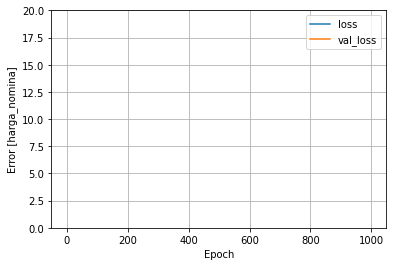

In [26]:
plot_loss(history)

In [27]:
test_result = model.evaluate(test_features,
                             test_labels,
                             verbose=0)
print(test_result)

570540.3125


In [28]:
test_predictions = model.predict(test_features).flatten()

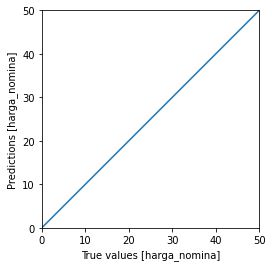

In [29]:
a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True values [harga_nomina]')
plt.ylabel('Predictions [harga_nomina]')
lims = [0, 50]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

In [30]:
test_predictions

array([1241256.5 , 1241256.5 , 1623634.9 ,  376641.44, 1295006.9 ,
       1617035.9 , 1623634.9 ,  690623.94, 1101889.1 ,  693923.4 ,
       1641175.8 ,  826691.8 , 1241256.5 , 1301605.8 ,  887041.06,
       1712871.  , 1716170.5 ,  259966.17, 1085796.  , 1229186.6 ,
       1092394.9 , 1092394.9 , 1092394.9 , 1085796.  , 1641175.8 ,
        614905.4 ,  614905.4 , 1036068.8 , 1301605.8 , 1032769.3 ,
        621504.2 , 1036068.8 , 1641175.8 , 1641175.8 , 1189677.6 ,
       1186378.2 , 1192977.  ,  778412.3 , 1192977.  , 1702369.9 ,
       1287805.2 ,  680122.94,  683422.25,  683422.25,  398326.72,
       1294404.1 , 1287805.2 ,  398326.72, 1581671.2 ,  752542.  ,
       1706393.2 , 1670183.6 , 1670183.6 , 1670183.6 , 1109333.  ,
       1493159.1 , 1493159.1 , 1078594.4 , 1155036.9 , 1569601.2 ,
       1155036.9 ,  332506.38, 1155036.9 , 1155036.9 , 1569601.2 ,
       1713716.  , 1717015.2 ,  887886.  , 1625927.6 , 1548761.  ,
       1625927.6 , 1552060.5 , 1548761.  , 1548761.  , 1266241

In [31]:
test_labels

11       550000
19       850000
23      1200000
25       500000
28       750000
         ...   
1046     350000
1047     600000
1055     500000
1058     700000
1064     300000
Name: harga_nomina, Length: 214, dtype: int64

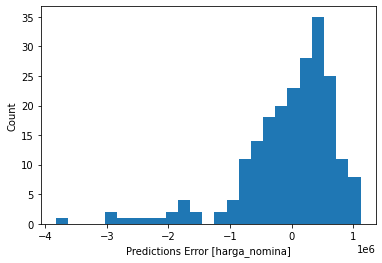

In [32]:
error = test_predictions - test_labels
plt.hist(error, bins=25)
plt.xlabel('Predictions Error [harga_nomina]')
_ = plt.ylabel('Count')

In [33]:
model.save('getkos_model')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: getkos_model/assets


In [34]:
reloaded = tf.keras.models.load_model('getkos_model')

In [35]:
test_result = reloaded.evaluate(
    test_features, test_labels, verbose=0
)

print(test_result)

570540.3125


In [36]:
converter = tf.lite.TFLiteConverter.from_saved_model('getkos_model')
tflite_model = converter.convert()

In [37]:
with open('model_getkos_regression.tflite', 'wb') as f:
    f.write(tflite_model)

In [38]:
test_features[3:4]

,kota,type_kos,area,facility_score
25,5,2,49,0


In [39]:
model.predict(np.array(test_features[3:4]))

array([[376641.47]], dtype=float32)

In [40]:
test_labels[3:4]

25    500000
Name: harga_nomina, dtype: int64

In [45]:
raw_dataset

,kost_name_rough,kota,type_kos,area,facility_score,harga_nomina
0,Campur Sisa 2 Kamar Kost De' Leota Tipe C Pete...,semarang,campur,semarang tengah,6,1600000
1,Kos Andalan Campur Kost DS CoLive 34 Pecinan S...,semarang,campur,semarang tengah,6,2000000
2,Kos Andalan Campur Kost Altaf Putra Tipe A Pur...,semarang,campur,semarang timur,6,1000000
3,Kos Andalan Campur Kost Pantes Brumbungan Loyo...,semarang,campur,semarang tengah,6,3500000
4,Campur Sisa 3 Kamar Kost De' Leota Tipe A Pete...,semarang,campur,semarang tengah,6,1400000
...,...,...,...,...,...,...
1063,Putri Kost Sonnya Klojen Malang Klojen WiFi Rp...,malang,putri,klojen,2,700000
1064,Putri Kost Srikandi Sukun Malang Sukun WiFi · ...,malang,putri,sukun,4,300000
1065,Putri Kost The Imajo Depok Sleman Depok K. Man...,jogja,putri,depok,6,1299999
1066,Putri Kost WatuGong Tipe A Lowokwaru Malang Lo...,malang,putri,lowokwaru,6,1200000


In [53]:
def proc_df(df, y_fld = 'harga_nomina', skip_flds='kost_name_rough',na_dict = {}, max_n_cat = None):

	y = dataset[y_fld].values
	dataset.drop([y_fld], axis=1, inplace=True)

	for n,c in dataset.items(): 
	    if not is_numeric_dtype(c) and (max_n_cat is None or c.nunique()>max_n_cat):
	        dataset[n] = c.cat.codes+1
	    
	res = [pd.get_dummies(dataset, dummy_na=True), y, na_dict]

	return res

In [54]:
raw_dataset['kost_name_rough']

0       Campur Sisa 2 Kamar Kost De' Leota Tipe C Pete...
1       Kos Andalan Campur Kost DS CoLive 34 Pecinan S...
2       Kos Andalan Campur Kost Altaf Putra Tipe A Pur...
3       Kos Andalan Campur Kost Pantes Brumbungan Loyo...
4       Campur Sisa 3 Kamar Kost De' Leota Tipe A Pete...
                              ...                        
1063    Putri Kost Sonnya Klojen Malang Klojen WiFi Rp...
1064    Putri Kost Srikandi Sukun Malang Sukun WiFi · ...
1065    Putri Kost The Imajo Depok Sleman Depok K. Man...
1066    Putri Kost WatuGong Tipe A Lowokwaru Malang Lo...
1067    Putri Kost Wisma Aisyah Bantul Bantul K. Mandi...
Name: kost_name_rough, Length: 1068, dtype: object

In [55]:
x, y, nas = proc_df(raw_dataset, y_fld ='harga_nomina', na_dict = {}, max_n_cat = None)

In [57]:
y

array([1600000, 2000000, 1000000, ..., 1299999, 1200000,  550000])

In [56]:
x

,kota,type_kos,area,facility_score
0,5,1,56,6
1,5,1,56,6
2,5,1,57,6
3,5,1,56,6
4,5,1,56,6
...,...,...,...,...
1063,4,3,36,2
1064,4,3,65,4
1065,3,3,17,6
1066,4,3,39,6


In [58]:
def get_dict_encode(df_1,df_2,col='kota'):
    
    zip_iterator = zip(
        list(df_1.groupby([col]).size().reset_index(name='counts')[col]), 
        list(df_2.groupby([col]).size().reset_index(name='counts')[col])
    )
    
    return dict(zip_iterator)

In [59]:
dict_kota = get_dict_encode(raw_dataset,x,col='kota')
dict_type_kos = get_dict_encode(raw_dataset,x,col='type_kos')
dict_area = get_dict_encode(raw_dataset,x,col='area')

{
	"type_kos":[
	    {"name":"campur","value":"1"},
	    {"name":"putra","value":"2"},
	    {"name":"putri","value":"3"}
    ]
}

In [70]:
map_kota = {"kota":[]}
for nm, val in dict_kota.items():
    map_kota['kota'].append({"name":nm,"value":val})
    
map_type_kos = {"type_kos":[]} 
for nm, val in dict_type_kos.items():
    map_type_kos['type_kos'].append({"name":nm,"value":val})
    
map_area = {"area":[]}
for nm, val in dict_area.items():
    map_area['area'].append({"name":nm,"value":val})

In [71]:
print(map_kota)
print(map_type_kos)
print(map_area)

{'kota': [{'name': 'bandung', 'value': 1}, {'name': 'jakarta', 'value': 2}, {'name': 'jogja', 'value': 3}, {'name': 'malang', 'value': 4}, {'name': 'semarang', 'value': 5}, {'name': 'surabaya', 'value': 6}]}
{'type_kos': [{'name': 'campur', 'value': 1}, {'name': 'putra', 'value': 2}, {'name': 'putri', 'value': 3}]}
{'area': [{'name': 'arcamanik', 'value': 1}, {'name': 'babakan ciparay', 'value': 2}, {'name': 'bandung kidul', 'value': 3}, {'name': 'bandung wetan', 'value': 4}, {'name': 'bantul', 'value': 5}, {'name': 'banyumanik', 'value': 6}, {'name': 'batu', 'value': 7}, {'name': 'batununggal', 'value': 8}, {'name': 'blimbing', 'value': 9}, {'name': 'bojongloa kidul', 'value': 10}, {'name': 'buahbatu', 'value': 11}, {'name': 'cibeunying kaler', 'value': 12}, {'name': 'cicendo', 'value': 13}, {'name': 'cidadap', 'value': 14}, {'name': 'cilandak', 'value': 15}, {'name': 'coblong', 'value': 16}, {'name': 'depok', 'value': 17}, {'name': 'dukuhpakis', 'value': 18}, {'name': 'duren sawit', 

In [72]:
with open('cat_map_kota.json', 'w') as fp:
    json.dump(map_kota, fp)
with open('cat_map_type_kos.json', 'w') as fp:
    json.dump(map_type_kos, fp)
with open('cat_map_area.json', 'w') as fp:
    json.dump(map_area, fp)